In [1]:
# importing the libraries
import nltk
from nltk import FreqDist
from nltk.corpus import brown, stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# download the necessary NLTK resources
nltk.download('brown')
nltk.download('punkt')
nltk.download('stopwords')

# load from the brown corpus
words = brown.words()
sentences = brown.sents()

/Users/mohammadrad/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[nltk_data] Downloading package brown to
[nltk_data]     /Users/mohammadrad/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohammadrad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohammadrad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Question 1

# frequency distribution of the words
word_freq = FreqDist(words)

# save the frequency data to a text file
with open('word_freq.txt', 'w') as f:
    for word, freq in word_freq.items():
        f.write(f"{word}: {freq}\n")
        print(f"{word}: {freq}")

The: 7258
Fulton: 17
County: 85
Grand: 18
Jury: 4
said: 1943
Friday: 60
an: 3542
investigation: 43
of: 36080
Atlanta's: 4
recent: 167
primary: 93
election: 72
produced: 90
``: 8837
no: 1781
evidence: 201
'': 8789
that: 10237
any: 1301
irregularities: 8
took: 425
place: 528
.: 49346
jury: 63
further: 194
in: 19536
term-end: 1
presentments: 1
the: 62713
City: 134
Executive: 9
Committee: 88
,: 58334
which: 3540
had: 5102
over-all: 35
charge: 120
deserves: 16
praise: 17
and: 27915
thanks: 27
Atlanta: 35
for: 8841
manner: 124
was: 9777
conducted: 55
September-October: 1
term: 79
been: 2470
charged: 57
by: 5103
Superior: 16
Court: 110
Judge: 39
Durwood: 1
Pye: 1
to: 25732
investigate: 11
reports: 78
possible: 373
hard-fought: 2
won: 68
Mayor-nominate: 1
Ivan: 4
Allen: 20
Jr.: 75
Only: 102
a: 21881
relative: 44
handful: 13
such: 1192
received: 163
considering: 39
widespread: 30
interest: 323
number: 467
voters: 18
size: 138
this: 3966
city: 259
it: 6723
did: 994
find: 395
many: 925
Georgia's:

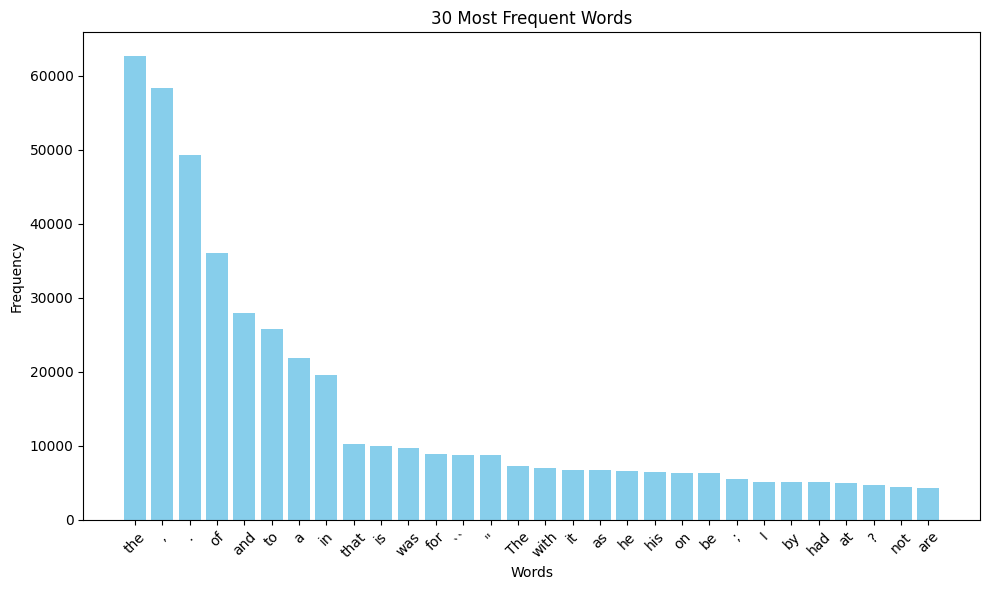

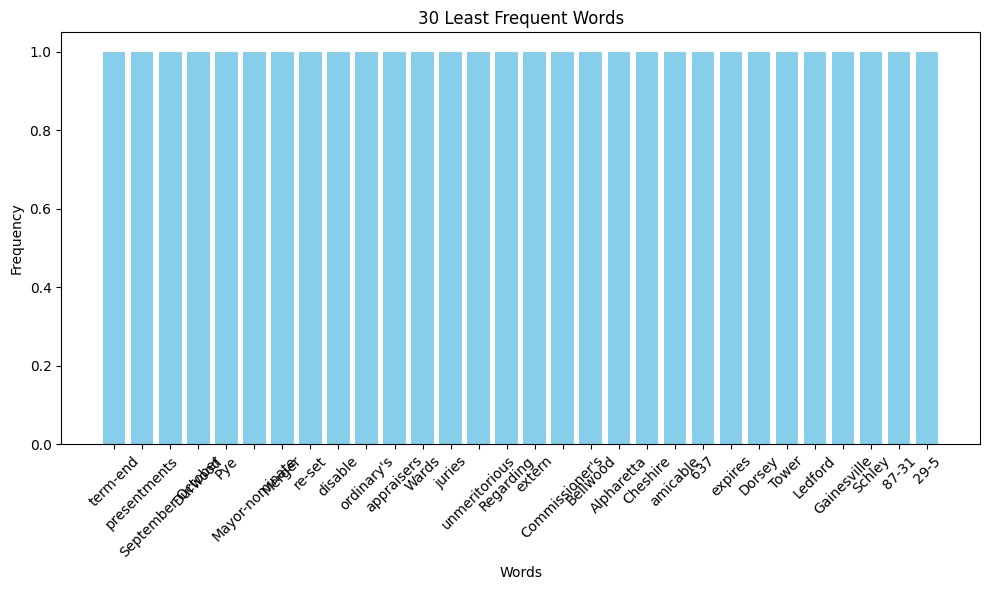

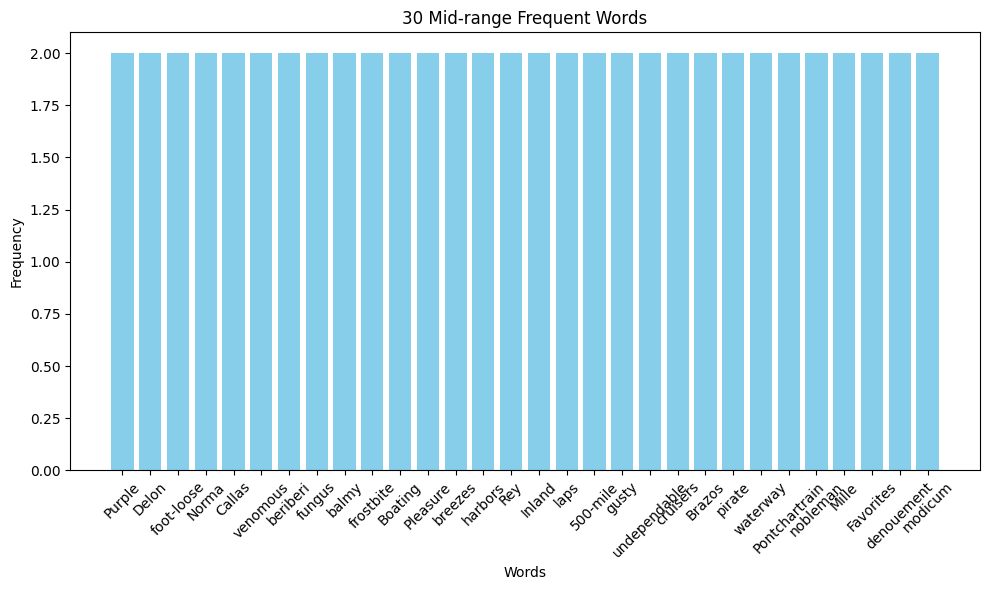

In [3]:
# Question 2 & 3

# function to plot a bar chart
def plot_word_frequencies(word_list, title):
    words, frequencies = zip(*word_list)
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# get the 30 most common words
most_common_words = word_freq.most_common(30)


# get the 30 least common words
# to get the last 30 items, we can sort the dictionary based on frequency and select 30 items with least frequency
sorted_words = sorted(word_freq.items(), key=lambda x: x[1])
least_common_words = sorted_words[:30]

# get the 30 middle frequency words
# to get the middle 30 items, we can sort the dictionary based on frequency, find the index of the middle of the list, then select 15 items from each side
mid_index = len(sorted_words) // 2
mid_index_start = mid_index - 15
mid_index_end = mid_index + 15
mid_range_words = sorted_words[mid_index_start:mid_index_end]


plot_word_frequencies(most_common_words, '30 Most Frequent Words')
plot_word_frequencies(least_common_words, '30 Least Frequent Words')
plot_word_frequencies(mid_range_words, '30 Mid-range Frequent Words')

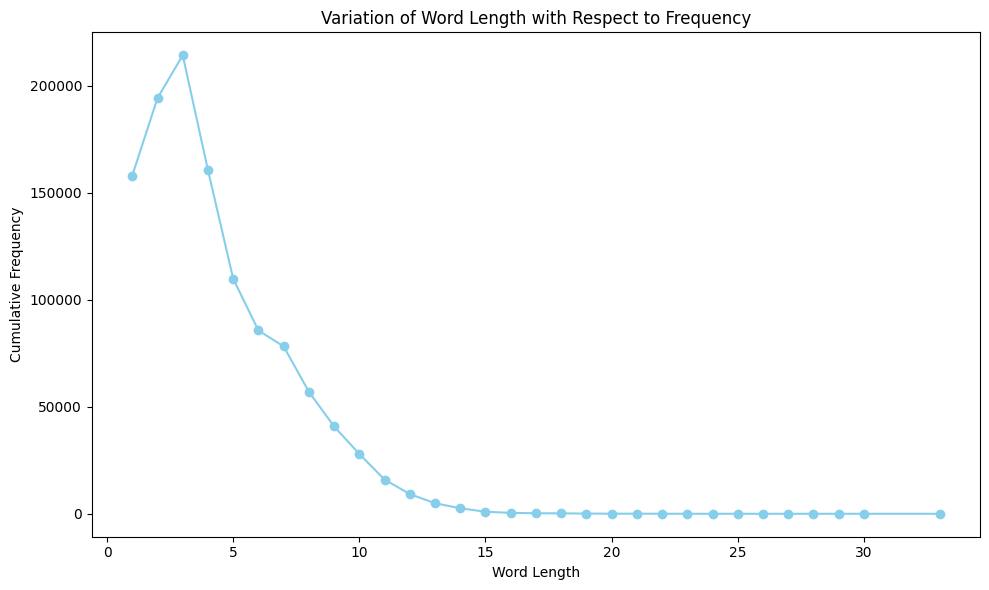

In [4]:
# Question 4

# dictionary to store cumulative frequencies by word length
length_freq = {}

for word, freq in word_freq.items():
    word_length = len(word)

    if word_length in length_freq:
        length_freq[word_length] += freq
    else:
        length_freq[word_length] = freq

# sort by the length of the words
sorted_lengths = sorted(length_freq.items())

lengths, frequencies = zip(*sorted_lengths)

plt.figure(figsize=(10, 6))
plt.plot(lengths, frequencies, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Word Length')
plt.ylabel('Cumulative Frequency')
plt.title('Variation of Word Length with Respect to Frequency')
plt.tight_layout()
plt.show()

frequency of 'will': 2204
frequency of 'must': 1003
frequency of 'might': 670
frequency of 'may': 1292
frequency of 'could': 1580
frequency of 'can': 1738


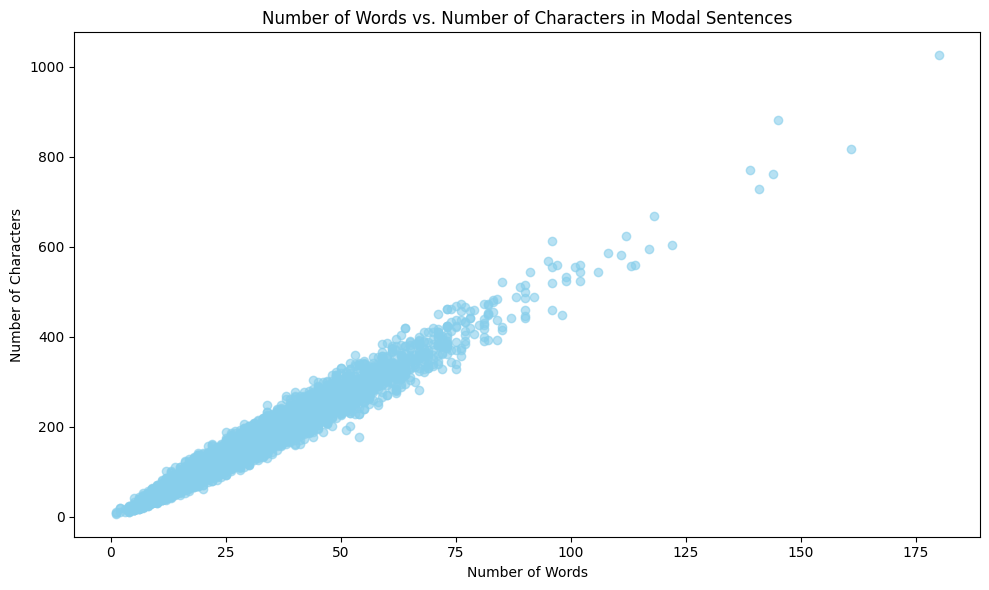

In [5]:
# Question 5

modal_words = ['will', 'must', 'might', 'may', 'could', 'can']

# frequency of each modal word
modal_freq = {word: word_freq[word.lower()] for word in modal_words}

for modal_word, freq in modal_freq.items():
    print(f"frequency of '{modal_word}': {freq}")



# Part 2

modal_sentences_lengths = []

for sentence in sentences:
    sentence_text = ' '.join(sentence)
    
    if any(modal_word in sentence_text for modal_word in modal_words):
        word_count = len(sentence)
        char_count = len(sentence_text)
        modal_sentences_lengths.append((word_count, char_count))


word_counts, char_counts = zip(*modal_sentences_lengths)

# plot stop words vs. words
plt.figure(figsize=(10, 6))
plt.scatter(word_counts, char_counts, color='skyblue', alpha=0.6)
plt.xlabel('Number of Words')
plt.ylabel('Number of Characters')
plt.title('Number of Words vs. Number of Characters in Modal Sentences')
plt.tight_layout()
plt.show()


# print("\nresults for the first 10 sentences:")
# for i, (word_count, char_count) in enumerate(modal_sentences_lengths[:10], 1):
#     print(f"Words = {word_count}, Characters = {char_count}")

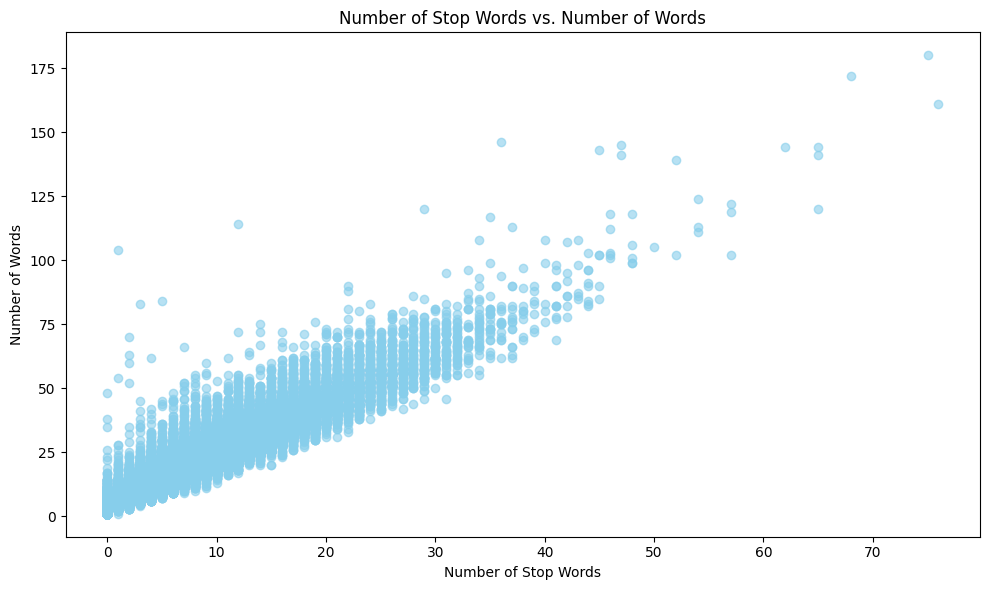

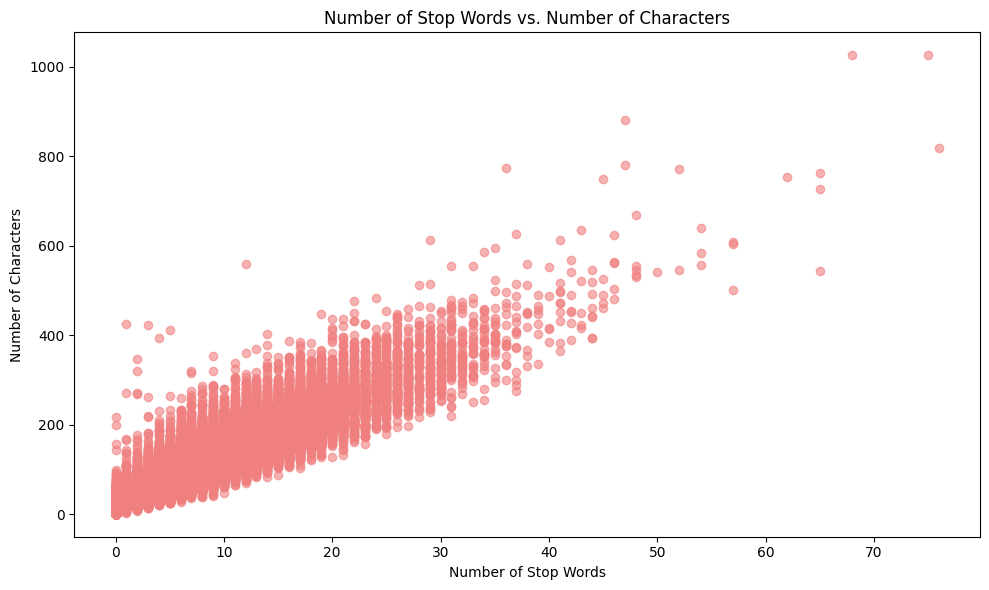

In [6]:
# Question 6

stop_words = set(stopwords.words('english'))

def calculate_stopwords_and_lengths(sentence):
    sentence_text = ' '.join(sentence)
    tokens = word_tokenize(sentence_text)

    # count the number of stop words in the sentence
    stopword_count = sum(1 for tok in tokens if tok in stop_words)

    word_count = len(sentence)
    char_count = len(sentence_text)
    return((stopword_count, word_count, char_count))

sentences_data = []
for sentence in sentences:
    sdata = calculate_stopwords_and_lengths(sentence)
    sentences_data.append(sdata)



stopword_counts, word_counts, char_counts = zip(*sentences_data)

# plot stop words vs. words
plt.figure(figsize=(10, 6))
plt.scatter(stopword_counts, word_counts, color='skyblue', alpha=0.6)
plt.xlabel('Number of Stop Words')
plt.ylabel('Number of Words')
plt.title('Number of Stop Words vs. Number of Words')
plt.tight_layout()
plt.show()

# plot stop words vs. characters
plt.figure(figsize=(10, 6))
plt.scatter(stopword_counts, char_counts, color='lightcoral', alpha=0.6)
plt.xlabel('Number of Stop Words')
plt.ylabel('Number of Characters')
plt.title('Number of Stop Words vs. Number of Characters')
plt.tight_layout()
plt.show()


In [7]:
# Question 7

with open('input.txt', 'r') as f:
    input_text = f.read()

tokens = word_tokenize(input_text)

with open('output.txt', 'w') as f:
    f.write(f"Total Number of Tokens: {len(tokens)}\n")
    print(f"Total Number of Tokens: {len(tokens)}")

    token_freq = FreqDist(tokens)
    token_sorted = sorted(token_freq.items(), key=lambda x: x[1], reverse= True)

    f.write(f"Number of Distinct Tokens: {len(token_sorted)}\n")
    print(f"Number of Distinct Tokens: {len(token_sorted)}")

    f.write(f"Frequency of Tokens (Sorted):\n")
    print("Frequency of Tokens (Sorted):")

    for token, freq in token_sorted:
        f.write(f"{token}: {freq}\n")
        print(f"{token}: {freq}")


Total Number of Tokens: 22
Number of Distinct Tokens: 16
Frequency of Tokens (Sorted):
is: 4
it: 3
.: 2
a: 1
sample: 1
i: 1
am: 1
at: 1
university: 1
of: 1
oulu: 1
business: 1
analytics: 1
my: 1
field: 1
what: 1


In [8]:
# Question 8

URL = "https://www.cdn.geeksforgeeks.org/data-structures/"
r = requests.get(URL)

soup = BeautifulSoup(r.text, 'html.parser')
tokens = word_tokenize(soup.text)

with open('web_output.txt', 'w') as f:

    f.write(f"Total Number of Tokens: {len(tokens)}\n")
    print(f"Total Number of Tokens: {len(tokens)}")

    token_freq = FreqDist(tokens)
    token_sorted = sorted(token_freq.items(), key=lambda x: x[1], reverse= True)

    f.write(f"Number of Distinct Tokens: {len(token_sorted)}\n")
    print(f"Number of Distinct Tokens: {len(token_sorted)}")

    f.write(f"Frequency of Tokens (Sorted):\n")
    print("Frequency of Tokens (Sorted):")
    
    for token, freq in token_sorted:
        f.write(f"{token}: {freq}\n")
        print(f"{token}: {freq}")



Total Number of Tokens: 6388
Number of Distinct Tokens: 1554
Frequency of Tokens (Sorted):
(: 214
): 212
of: 133
a: 125
Data: 119
.: 105
,: 102
and: 100
Tree: 99
|: 82
the: 81
:: 80
is: 77
in: 72
1: 63
to: 60
Linked: 59
List: 57
Structures: 53
for: 53
Structure: 51
Binary: 51
on: 48
A: 46
;: 41
data: 38
B: 31
Question: 31
min: 31
read: 31
?: 30
2: 30
&: 29
tree: 29
Search: 28
an: 28
C: 28
node: 28
n: 27
with: 26
array: 26
Articles: 25
Set: 23
given: 23
D: 23
Queue: 22
Stack: 21
linked: 21
nodes: 21
list: 21
Array: 20
are: 20
Introduction: 20
All: 20
following: 20
*: 20
from: 19
Suffix: 18
binary: 18
that: 17
Interview: 16
using: 16
–: 16
Heap: 16
Graph: 15
In: 15
or: 15
be: 15
all: 15
3: 15
BST: 15
elements: 14
[: 14
]: 14
Find: 14
The: 14
structure: 13
Trees: 13
4: 13
matrix: 13
if: 13
{: 13
gt: 13
S: 13
can: 12
’: 12
as: 12
Sort: 12
Practice: 12
k: 12
\: 12
Answer: 12
Explanation: 12
/: 12
operation: 12
DSA: 11
at: 11
two: 11
Coding: 11
Recent: 11
stack: 11
Inorder: 11
=: 11
c: 11
b: